<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part1/ch01_summarizing.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summarizing 1D Data

After visualizing data, we need numerical summaries to describe datasets quantitatively. This section covers fundamental descriptive statistics that allow us to characterize location (where the data is centered) and scale (how spread out the data is).

## 1. The Mean

The **mean** (or average) is the most common measure of central tendency. It represents the "center of mass" of the data.

### Definition

For a dataset $\{x\}$ of $N$ data items $x_1, \ldots, x_N$, the mean is:

$$\text{mean}(\{x\}) = \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$


In [1]:
#generate 10 random values between 1 and 100
import numpy as np
import matplotlib.pyplot as plt
data = np.random.randint(1, 101, size=10)
print(data)
sum = 0
for value in data:
    sum += value
mean = sum / len(data)
print("Mean:", mean)

[75 26 98 15 68 45 96 66 57 24]
Mean: 57.0


You can simply calculate the mean by using the prebuilt functions in libraries like NumPy:

In [2]:
print("Mean: ",np.mean(data))

Mean:  57.0



### Properties of the Mean

The mean has several important mathematical properties:

**Property 1: Translation**
- $\text{mean}(\{x + c\}) = \text{mean}(\{x\}) + c$

In [3]:
data_t = data + 32
print(data)
print(data_t)
print(" Mean(data + 32) = ", np.mean(data_t))
print(" Mean(data) + 32 = ", np.mean(data) + 32)

[75 26 98 15 68 45 96 66 57 24]
[107  58 130  47 100  77 128  98  89  56]
 Mean(data + 32) =  89.0
 Mean(data) + 32 =  89.0


**Property 2: Scaling**
- $\text{mean}(\{kx\}) = k \cdot \text{mean}(\{x\})$

In [4]:
data_s = data * 3
print(data)
print(data_s)
print(" Mean(data * 3) = ", np.mean(data_s))
print(" Mean(data) * 3 = ", np.mean(data) * 3)

[75 26 98 15 68 45 96 66 57 24]
[225  78 294  45 204 135 288 198 171  72]
 Mean(data * 3) =  171.0
 Mean(data) * 3 =  171.0



**Property 2: Sum of Deviations**
- The sum of deviations from the mean equals zero: 

$$\sum_{i=1}^{N} (x_i - \bar{x}) = 0$$

**Proof**:

$$\sum_{i=1}^{N} (x_i - \bar{x}) = \sum_{i=1}^{N} x_i - \sum_{i=1}^{N} \bar{x} = \sum_{i=1}^{N} x_i - N \cdot \bar{x} $$

$$ = \sum_{i=1}^{N} x_i - N \cdot \left(\frac{1}{N} \sum_{i=1}^{N} x_i\right) = \sum_{i=1}^{N} x_i - \sum_{i=1}^{N} x_i = 0$$


In [5]:
# Deviations from the mean
data = np.random.randint(1, 101, size=10)
print("\ndata:")
print(data)
print(f"Mean: {np.mean(data):.2f}")
deviations = data - np.mean(data)
print("Deviations from mean:")
print(deviations)

# Sum of deviations (should be zero)
sum_of_deviations = deviations.sum()
print(f"\nSum of deviations: {sum_of_deviations:.2f}")


data:
[82 51 41 27  9 75 38 53 83 29]
Mean: 48.80
Deviations from mean:
[ 33.2   2.2  -7.8 -21.8 -39.8  26.2 -10.8   4.2  34.2 -19.8]

Sum of deviations: 0.00


**Property 3: Minimizing Squared Deviations**

The mean minimizes the sum of squared deviations:

$$\text{mean}(\{x\}) = \arg\min_{c} \sum_{i=1}^{N} (x_i - c)^2$$

**Proof**: The proof involves taking the derivative of the sum of squared deviations with respect to $c$, setting it to zero, and solving for $c$.

Let 

$$f(c) = \sum_{i=1}^{N} (x_i - c)^2 = \sum_{i=1}^{N} (x_i^2 - 2x_i c + c^2)$$

Taking the derivative with respect to $c$:

$$f'(c) = \sum_{i=1}^{N} (-2x_i + 2c) = \sum_{i=1}^{N} -2(x_i - c) = -2 \sum_{i=1}^{N} (x_i - c)$$

Setting the derivative to zero to find the minimum:

$$-2 \sum_{i=1}^{N} (x_i - c) = 0$$

$$\sum_{i=1}^{N} (x_i - c) = 0$$

$$\sum_{i=1}^{N} x_i - N \cdot c = 0$$

Solving for $c$:

$$c = \frac{1}{N} \sum_{i=1}^{N} x_i = \bar{x}$$

Thus, the mean $\bar{x}$ minimizes the sum of squared deviations.

[81  8 20 96 44  9 49 74 11 12]

Sum of squared deviations from the mean: 10078.40

Sum of squared deviations from c=mean-1: 10088.40

Sum of squared deviations from c=mean+1: 10088.40


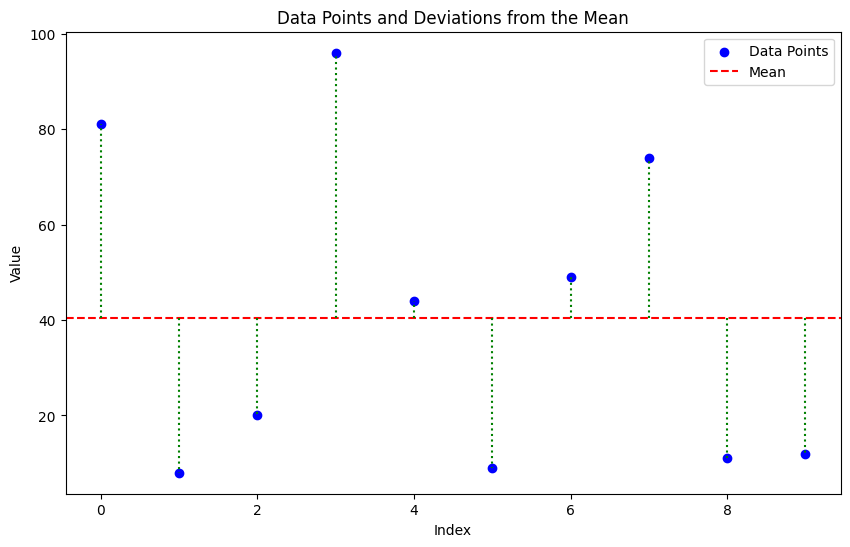

In [6]:
# Minimizing Squared Deviations
data = np.random.randint(1, 101, size=10)
print(data)
mean_value = np.mean(data)
squared_deviations = (data - mean_value) ** 2
sum_of_squared_deviations = squared_deviations.sum()
print(f"\nSum of squared deviations from the mean: {sum_of_squared_deviations:.2f}") 
print(f"\nSum of squared deviations from c=mean-1: {((data - (mean_value - 1)) ** 2).sum():.2f}")
print(f"\nSum of squared deviations from c=mean+1: {((data - (mean_value + 1)) ** 2).sum():.2f}")  
# Visualizing Squared Deviations
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color='blue', label='Data Points')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')
for i in range(len(data)):
    plt.plot([i, i], [mean_value, data[i]], color='green', linestyle=':')
plt.title('Data Points and Deviations from the Mean')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## 2. The Standard Deviation ($\sigma$)
The **standard deviation** measures the spread or dispersion of a dataset around its mean. A low standard deviation indicates that the data points are close to the mean, while a high standard deviation indicates that they are more spread out.
### Definition
The standard deviation is defined as the square root of the variance, which is the average of the squared deviations from the mean.


$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2}$$

$$\sigma = \sqrt{mean({(x_i - \bar{x})^2})}$$


In [7]:
data = np.random.randint(1, 101, size=10)
print(data)
# Computing Standard Deviation and Variance
mean_value = np.mean(data)
variance = np.mean((data - mean_value) ** 2)
std_deviation = np.sqrt(variance)
print(f"\nVariance: {variance:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")   
# more simple way to compute std and variance
print(f"Variance (using np.var): {np.var(data):.2f}")
print(f"Standard Deviation (using np.std): {np.std(data):.2f}")

[ 15   3  85  26  69  38  94 100  78   5]

Variance: 1296.81
Standard Deviation: 36.01
Variance (using np.var): 1296.81
Standard Deviation (using np.std): 36.01


**Question**: Why do we square the deviations when calculating variance and standard deviation instead of using absolute deviations?

>Squaring the deviations has several advantages:
>1. **Mathematical Convenience**: Squared deviations are easier to manipulate mathematically, especially when taking derivatives, which is useful in optimization problems.
>2. **Emphasizing Larger Deviations**: Squaring gives more weight to larger deviations, making the standard deviation more sensitive to outliers.
>3. **Differentiability**: The squared function is differentiable everywhere, while the absolute value function is not differentiable at zero, complicating mathematical analysis.

**Question**: Can a standard deviation be negative?

>No, a standard deviation cannot be negative. By definition, the standard deviation is the square root of the variance, and since variance is calculated as the average of squared deviations from the mean, it is always non-negative. Therefore, the standard deviation, being the square root of a non-negative number, is also always non-negative.

**Property 1: Translation**

Translating all data points by a constant does not change the standard deviation:

$$\text{std}(\{x + c\}) = \text{std}(\{x\})$$

**Property 2: Scaling**

Scaling all data points by a constant scales the standard deviation by the absolute value of that constant:

$$\text{std}(\{kx\}) = |k| \cdot \text{std}(\{x\})$$

## 3 Computing Mean and Standard Deviation Online

One useful feature of means and standard deviations is that you can estimate them **online** - you can update your estimates as new data arrives without storing all previous data.

### Online Algorithm

After seeing $k$ elements, write $\hat{\mu}_k$ for the estimated mean and $\hat{\sigma}_k$ for the estimated standard deviation.

**Mean Update:**

$$\hat{\mu}_{k+1} = \frac{k \cdot \hat{\mu}_k + x_{k+1}}{k+1}$$

**Standard Deviation Update:**

$$\hat{\sigma}_{k+1} = \sqrt{\frac{k \cdot \hat{\sigma}_k^2 + (x_{k+1} - \hat{\mu}_{k+1})^2}{k+1}}$$

This is particularly useful for streaming data or when memory is limited.

In [8]:
class OnlineStats:
    def __init__(self):
        self.count = 0
        self.mean = 0.0
        self.var = 0.0
    
    def update(self, x):
        self.count += 1
        k = self.count
        
        # Update mean
        new_mean = ((k-1) * self.mean + x) / k
        
        # Update variance
        if k > 1:
            new_var = ((k-1) * self.var + (x - new_mean)**2) / k
            self.var = new_var
        
        self.mean = new_mean
    
    @property
    def std(self):
        return np.sqrt(self.var)

# Example usage
stats = OnlineStats()
data = np.random.randint(1, 101, size=10)
print("Data:")
print(data)
for value in data:
    stats.update(value)

# Compute NumPy statistics for comparison
np_mean = np.mean(data)
np_std = np.std(data)

print(f"Online Mean: {stats.mean:,.2f}")
print(f"Online Std: {stats.std:,.2f}")
print(f"\nComparison with NumPy:")
print(f"NumPy Mean: {np_mean:,.2f}")
print(f"NumPy Std: {np_std:,.2f}")
print(f"\nDifferences:")
print(f"Mean difference: {abs(stats.mean - np_mean):.10f}")
print(f"Std difference: {abs(stats.std - np_std):.10f}")

Data:
[97 95 20 80 34 87 89 40 15 68]
Online Mean: 62.50
Online Std: 26.87

Comparison with NumPy:
NumPy Mean: 62.50
NumPy Std: 30.44

Differences:
Mean difference: 0.0000000000
Std difference: 3.5741156304


## 4 The Median

The **median** is an alternative measure of central tendency that is more robust to outliers than the mean.

### Definition

The median is obtained by:
1. Sorting the data points
2. Finding the point halfway along the list
3. If the list has even length, averaging the two middle values

**Examples:**
- median({3, 5, 7}) = 5
- median({3, 4, 5, 6, 7}) = 5  
- median({3, 4, 5, 6}) = (4+5)/2 = 4.5

### Median vs Mean with Outliers

The median is less affected by extreme values (outliers) than the mean. For example, in the dataset {1, 2, 3, 100}, the mean is 26.5, while the median is 2.5. The outlier (100) skews the mean significantly, but the median remains representative of the central tendency of the majority of the data.

### Properties of the Median

- $\text{median}(\{x + c\}) = \text{median}(\{x\}) + c$
- $\text{median}(\{kx\}) = k \cdot \text{median}(\{x\})$

In [9]:
data = np.random.randint(1, 101, size=10)
print(data)
# Sensitivity of Mean vs. Median to Outliers
median = np.median(data)
mean = np.mean(data)
print(f"Original Data:")
print(data)
print(f"\nMean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Note: Median is the average of 5th and 6th values (even number of points)")

# Add extreme outlier
data_with_outlier = np.append(data, 1000000000)
mean_with = np.mean(data_with_outlier)
median_with = np.median(data_with_outlier)

print(f"\n--- With Extreme Outlier (1 billion) ---")
print(f"Mean: {mean_with:,.2f}")
print(f"Median: {median_with:.2f}")
print(f"\nChanges:")
print(f"Mean changed by: {mean_with - mean:,.2f} ({(mean_with/mean - 1)*100:.1f}%)")
print(f"Median changed by: {median_with - median:.2f} ({(median_with/median - 1)*100:.2f}%)")
print(f"\n✓ Mean is highly sensitive to the outlier!")
print(f"✓ Median barely changes!")

[79 11 15 59 36  7 10 55 53 95]
Original Data:
[79 11 15 59 36  7 10 55 53 95]

Mean: 42.00
Median: 44.50
Note: Median is the average of 5th and 6th values (even number of points)

--- With Extreme Outlier (1 billion) ---
Mean: 90,909,129.09
Median: 53.00

Changes:
Mean changed by: 90,909,087.09 (216450207.4%)
Median changed by: 8.50 (19.10%)

✓ Mean is highly sensitive to the outlier!
✓ Median barely changes!


## 5 Percentiles and Quartiles

### Percentiles

The **$k^{th}$ percentile** is the value such that $k\%$ of the data is less than or equal to that value.

We write $\text{percentile}(\{x\}, k)$ for the $k^{th}$ percentile.

### Quartiles

Quartiles divide the data into four equal parts:

- **First Quartile (Q1)**: $25^{th}$ percentile - $\text{percentile}(\{x\}, 25)$
- **Second Quartile (Q2)**: $50^{th}$ percentile (the median) - $\text{percentile}(\{x\}, 50)$
- **Third Quartile (Q3)**: $75^{th}$ percentile - $\text{percentile}(\{x\}, 75)$

### Interquartile Range (IQR)

The **interquartile range** measures the spread of the middle 50% of the data:

$$\text{IQR}(\{x\}) = Q3 - Q1 = \text{percentile}(\{x\}, 75) - \text{percentile}(\{x\}, 25)$$

The IQR is robust to outliers, unlike the standard deviation.

### Properties of the Interquartile Range

- Translation invariance: $\text{IQR}(\{x + c\}) = \text{IQR}(\{x\})$
- Scaling property: $\text{IQR}(\{kx\}) = |k| \cdot \text{IQR}(\{x\})$

### Outlier Detection

A common rule: data items are considered outliers if they are:
- Less than $Q1 - 1.5 \times \text{IQR}$, or
- Greater than $Q3 + 1.5 \times \text{IQR}$

This is the criterion used in box plots.

In [10]:
data = np.random.randint(1, 101, size=10)
print(data)
# Calculating Quartiles and IQR
std = np.std(data)
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # median
q3 = np.percentile(data, 75)
iqr = q3 - q1

print("Quartiles:")
print(f"Q1 (25th): ${q1:,.2f}")
print(f"Q2 (50th/Median): ${q2:,.2f}")
print(f"Q3 (75th): ${q3:,.2f}")
print(f"\nInterquartile Range: ${iqr:,.2f}")
print(f"Standard Deviation: ${std:,.2f}")

# Outlier detection bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"\nOutlier Detection Bounds:")
print(f"Lower: ${lower_bound:,.2f}")
print(f"Upper: ${upper_bound:,.2f}")

# Check for outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"\nOutliers: {outliers}")

#adding oultiers to see the effect
data = np.append(data, [150, 200, 300])
print("\nData with added outliers:")
print(data)
# Calculating Quartiles and IQR
std = np.std(data)
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # median
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Quartiles:")
print(f"Q1 (25th): ${q1:,.2f}")
print(f"Q2 (50th/Median): ${q2:,.2f}")
print(f"Q3 (75th): ${q3:,.2f}")
print(f"\nInterquartile Range: ${iqr:,.2f}")
print(f"Standard Deviation: ${std:,.2f}")   
# Outlier detection bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"\nOutlier Detection Bounds:")
print(f"Lower: ${lower_bound:,.2f}")
print(f"Upper: ${upper_bound:,.2f}")
# Check for outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"\nOutliers: {outliers}")    

[77  7  4 39 62 95 53 53 13 71]
Quartiles:
Q1 (25th): $19.50
Q2 (50th/Median): $53.00
Q3 (75th): $68.75

Interquartile Range: $49.25
Standard Deviation: $29.57

Outlier Detection Bounds:
Lower: $-54.38
Upper: $142.62

Outliers: []

Data with added outliers:
[ 77   7   4  39  62  95  53  53  13  71 150 200 300]
Quartiles:
Q1 (25th): $39.00
Q2 (50th/Median): $62.00
Q3 (75th): $95.00

Interquartile Range: $56.00
Standard Deviation: $81.58

Outlier Detection Bounds:
Lower: $-45.00
Upper: $179.00

Outliers: [200 300]


## 6 Using Summaries Sensibly

### Reporting Precision

Be careful about the number of **significant figures** you report. Statistical software produces many digits, but not all are meaningful.

**Example:** Reporting "mean pregnancy length = 32.833 weeks" implies precision to ~0.001 weeks or 10 minutes. This is unrealistic given:
- People's memories are imprecise
- Medical records have limited accuracy  
- Respondents may misreport

**Better:** "mean pregnancy length ≈ 32.8 weeks"

### Categorical vs Continuous Variables

The statement "the average US family has 2.6 children" is problematic because:
- Number of children is **categorical** (discrete values)
- No family actually has 2.6 children

**Better phrasing:** "The mean of the number of children in a US family is 2.6"

**Or better yet:** Report the median and distribution for categorical data.

### When Mean vs Median?

**Use the mean when:**
- Data is roughly symmetric
- No significant outliers
- Data is continuous

**Use the median when:**
- Data is skewed
- Outliers are present
- Data is categorical/ordinal
- You want a robust measure

**Best practice:** Look at both! If they differ significantly, investigate why.

## 7.1 Some properties of Histograms

The tails of a histogram are the relatively uncommon values that are significantly larger (resp. smaller) than the value at the
peak (which is sometimes called the mode). A histogram is unimodal if there is only one peak; if there are more than one,
it is multimodal, with the special term bimodal sometimes being used for the case where there are two peaks.

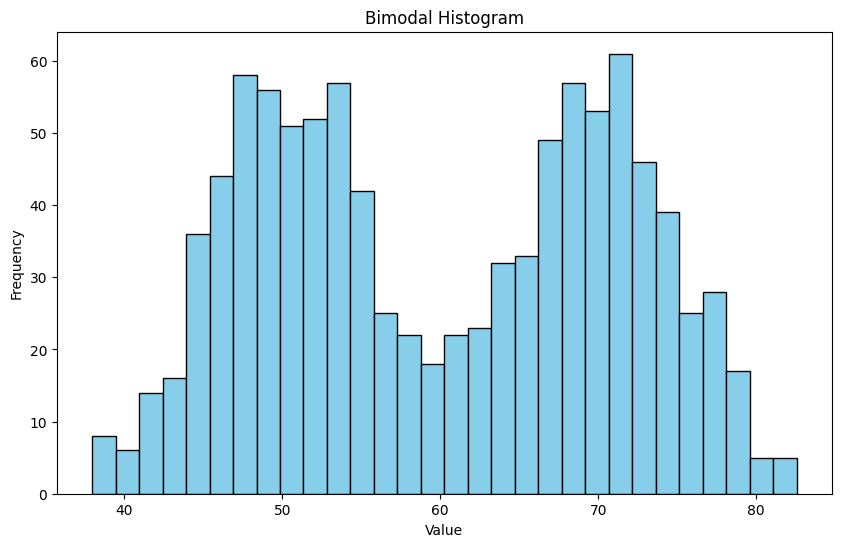

In [11]:
## mode, bimodal, multimodal histograms
data1 = np.random.normal(loc=50, scale=5, size=500)
data2 = np.random.normal(loc=70, scale=5, size=500)
data = np.concatenate([data1, data2])
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Bimodal Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Skewness refers to the asymmetry of a distribution. A histogram is right-skewed (positively skewed) if it has a long tail on the right side, and left-skewed (negatively skewed) if it has a long tail on the left side.

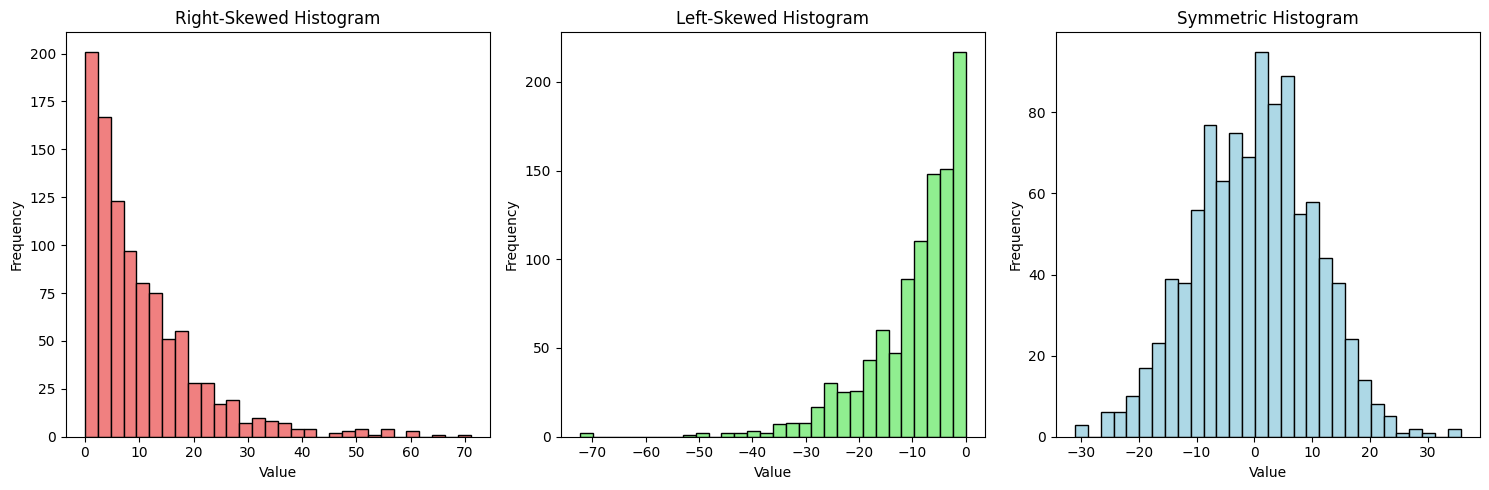

In [12]:
## Skewness
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Right-skewed
data_right_skewed = np.random.exponential(scale=10, size=1000)
axes[0].hist(data_right_skewed, bins=30, color='lightcoral', edgecolor='black')
axes[0].set_title('Right-Skewed Histogram')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Left-skewed
data_left_skewed = -np.random.exponential(scale=10, size=1000)
axes[1].hist(data_left_skewed, bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Left-Skewed Histogram')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Symmetric
data_symmetric = np.random.normal(loc=0, scale=10, size=1000)
axes[2].hist(data_symmetric, bins=30, color='lightblue', edgecolor='black')
axes[2].set_title('Symmetric Histogram')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 7.2 Standard Coordinates and Normal data

Histograms and summaries are useful, but sometimes we want to compare data from different scales|unit types. We can use standard coordinates for this purpose. We write z-scores to express how far a data point is from the mean in terms of standard deviations. we  could then normalize the data by subtracting the mean and dividing by the standard deviation.

### Definition

For data item $x_i$ with dataset mean $\bar{x}$ and standard deviation $\sigma$:

$$\hat{x_i} = \frac{x_i - \bar{x}}{\sigma}$$

We write $\{\hat{x}\}$ for a dataset in standard coordinates.

### Properties

- $\text{mean}(\{\hat{x}\}) = 0$ (always!)
- $\text{std}(\{\hat{x}\}) = 1$ (always!)
- Unitless - can compare across different measurements

### Interpretation

A z-score tells you how many standard deviations a value is from the mean:
- $\hat{x} = 0$: at the mean
- $\hat{x} = 1$: one standard deviation above the mean
- $\hat{x} = -2$: two standard deviations below the mean

[93 73 71 23 50 99 25  2 93 87]

Z-scores:
[ 0.9576732   0.34769027  0.28669198 -1.17726706 -0.3537901   1.14066808
 -1.11626877 -1.81774914  0.9576732   0.77467832]

Mean of z-scores: -0.00
Std of z-scores: 1.00


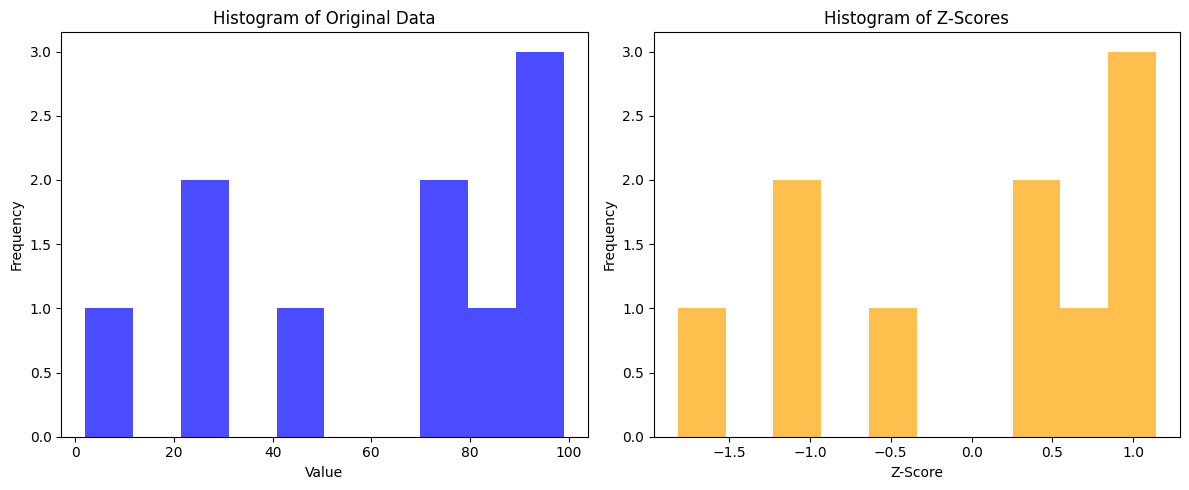

In [13]:
## 7 Standard Coordinates
data = np.random.randint(1, 101, size=10)
print(data)
mean_value = np.mean(data)
std_deviation = np.std(data)
z_scores = (data - mean_value) / std_deviation
print("\nZ-scores:")
print(z_scores)
print(f"\nMean of z-scores: {np.mean(z_scores):.2f}")
print(f"Std of z-scores: {np.std(z_scores):.2f}") 
# Histograms of Original Data vs. Z-Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Original Data')
plt.xlabel('Value')
plt.ylabel('Frequency') 
plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=10, color='orange', alpha=0.7)
plt.title('Histogram of Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()   

### Normal Data
Normal (Gaussian) data follows the bell curve shape. Many natural phenomena approximate normal distributions, especially when influenced by many small, independent factors (Central Limit Theorem). This curve is given by: 

$$y(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

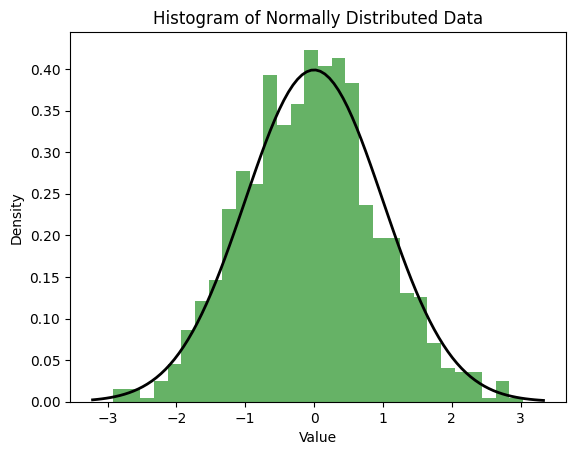

In [14]:
## Normal Data
import numpy as np
import matplotlib.pyplot as plt
# Generate normal data
normal_data = np.random.normal(loc=0, scale=1, size=1000)
# Plot histogram
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='g')
# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## 7.3 Box plots
Box plots (or box-and-whisker plots) provide a visual summary of a dataset's distribution, highlighting key statistics such as the median, quartiles, and potential outliers.
### Components of a Box Plot
- **Box**: Represents the interquartile range (IQR), spanning from the first quartile (Q1) to the third quartile (Q3).
- **Median Line**: A line inside the box indicates the median (Q2) of the dataset.
- **Whiskers**: Lines extending from the box to the smallest and largest values within 1.5 × IQR from Q1 and Q3, respectively.
- **Outliers**: Data points that fall outside the whiskers are often plotted as individual points, indicating potential outliers.  
 
![Box Plot](images/boxPlot.png)

Group 1:
  Mean: 19.92
  Median: 19.59
  Q1: 16.93
  Q3: 23.40
  IQR: 6.47
 Outliers: []

Group 2:
  Mean: 39.37
  Median: 39.07
  Q1: 35.83
  Q3: 43.36
  IQR: 7.53
 Outliers: [23.55729643]

Group 3:
  Mean: 59.10
  Median: 58.82
  Q1: 56.16
  Q3: 62.71
  IQR: 6.55
 Outliers: [46.17757301 46.02758527]

Group 4:
  Mean: 80.42
  Median: 80.12
  Q1: 76.31
  Q3: 83.89
  IQR: 7.58
 Outliers: []



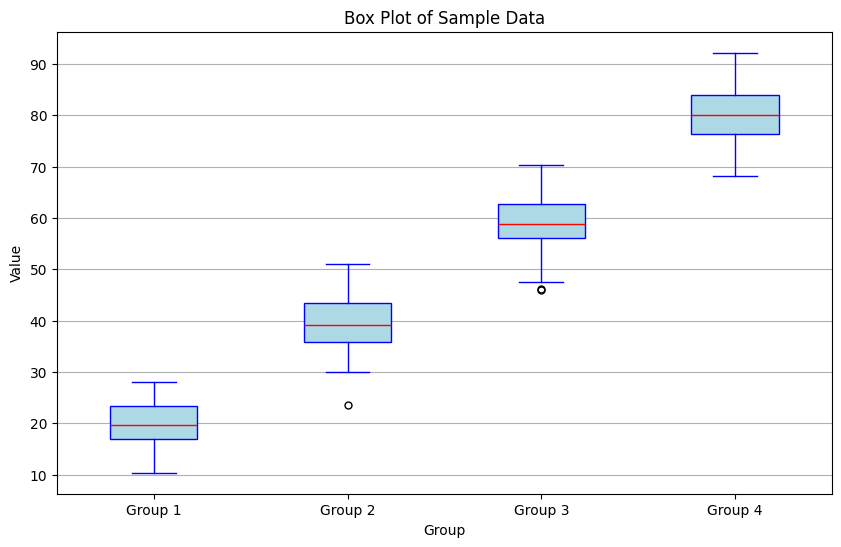

In [15]:
#Box plots
import numpy as np
import matplotlib.pyplot as plt
# Generate sample data
data = [np.random.normal(loc=mu, scale=5, size=100) for mu in [20, 40, 60, 80]]
#print the data by group with summaries
for i, group in enumerate(data, start=1):
    print(f"Group {i}:")
    print(f"  Mean: {np.mean(group):.2f}")
    print(f"  Median: {np.median(group):.2f}")
    print(f"  Q1: {np.percentile(group, 25):.2f}")
    print(f"  Q3: {np.percentile(group, 75):.2f}")
    print(f"  IQR: {np.percentile(group, 75) - np.percentile(group, 25):.2f}")
    print(f" Outliers: {group[(group < np.percentile(group, 25) - 1.5 * (np.percentile(group, 75) - np.percentile(group, 25))) | (group > np.percentile(group, 75) + 1.5 * (np.percentile(group, 75) - np.percentile(group, 25)))]}\n")
# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', markersize=5))
plt.title('Box Plot of Sample Data')
plt.xlabel('Group')
plt.ylabel('Value')
plt.xticks([1, 2, 3, 4], ['Group 1', 'Group 2', 'Group 3', 'Group 4'])
plt.grid(axis='y')
plt.show()

## Summary

### Location Parameters (Where is the data?)

| Measure | Formula | Robust? | Use When |
|---------|---------|---------|----------|
| Mean | $\frac{1}{N}\sum x_i$ | No | Symmetric data, no outliers |
| Median | Middle value | Yes | Skewed data, outliers present |

### Scale Parameters (How spread out?)

| Measure | Formula | Robust? | Use When |
|---------|---------|---------|----------|
| Std Dev | $\sqrt{\frac{1}{N}\sum(x_i-\bar{x})^2}$ | No | Normal-ish data |
| Variance | $(\text{std})^2$ | No | Mathematical convenience |
| IQR | $Q3 - Q1$ | Yes | Outliers present |

### Key Takeaways

1. **Mean vs Median**: Use median for skewed data or when outliers are present
2. **Standard Deviation**: Measures typical deviation from mean; sensitive to outliers
3. **IQR**: Robust measure of spread; good for data with outliers
4. **Z-scores**: Standardize data for comparison across different scales
5. **Precision matters**: Don't report meaningless digits
6. **Categorical data**: Prefer median and percentiles over mean

## Practice Problems

Try calculating these statistics for:

1. **Test scores**: [85, 92, 78, 90, 88, 95, 100, 72, 86, 91]
   - Mean, median, std dev, IQR
   - Compare mean vs median

2. **Income data** (deliberately skewed): [45000, 52000, 48000, 51000, 2500000, 46000, 49000]
   - Why is median better than mean here?
   - Calculate both and compare

3. **Heights** (in cm): [165, 170, 168, 172, 175, 171, 169, 173, 166, 174]
   - Convert to z-scores
   - Which heights are more than 1 std dev from mean?

## Next Steps

→ Continue to [1.4 Plots and Summaries](ch01_plots_summaries.md) to learn about combining visualizations with these numerical summaries.

→ See [Chapter 2: Looking at Relationships](chapter02.md) for analyzing relationships between variables.